In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# evaluation metrics
from sklearn.metrics import f1_score
# datasets
from sklearn.datasets import fetch_openml, fetch_20newsgroups
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784")
mnist_X = mnist.data.to_numpy()/255.0
mnist_y = mnist.target

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
spambase = pd.read_csv("spambase/spambase.data", delimiter=",", header=None)
# normalise spambase dataset
for i in spambase.columns[:-1]:
    spambase[i] = (spambase[i] - spambase[i].mean())/spambase[i].std()

# Part A) Running library PCA on MNIST with D = 5 features and D = 20 features

In [5]:
# dimensionality reduction
pca_5d = PCA(n_components=5)
mnist_X = pca_5d.fit_transform(mnist_X)
# train/test split
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, stratify=mnist_y, test_size=0.2)

In [6]:
log_reg = LogisticRegression()
log_reg.fit(mnist_X_train, mnist_y_train)

LogisticRegression()

In [7]:
y_pred = log_reg.predict(mnist_X_test)
print(f1_score(mnist_y_test, y_pred, average='weighted'))

0.6641745856549955


In [9]:
log_reg.coef_

array([[ 1.75575028, -0.22504774,  0.13262566, -0.56086485, -1.38167439],
       [-2.64837245, -1.53650299, -0.08964514,  0.30065122,  0.1573471 ],
       [ 0.41397092, -1.20156242,  0.56544867,  1.46649083,  0.80349301],
       [ 0.25335601, -1.24466477, -0.74038263, -0.96269532, -0.15444827],
       [-0.39936297,  1.85995492,  0.3359588 ,  0.64710214,  0.58895795],
       [ 0.68669769, -0.29065187, -0.34342015, -0.9578122 , -0.87141915],
       [ 0.43714315, -0.41637058,  0.67181149,  1.48214844,  0.67014984],
       [-0.49665223,  1.84504974, -0.26334841, -0.70450665, -0.94491153],
       [ 0.21217896, -0.42541754, -0.08575062, -0.39161344,  0.80667374],
       [-0.21470936,  1.63521325, -0.18329767, -0.31890018,  0.32583172]])

<Axes: ylabel='Feature'>

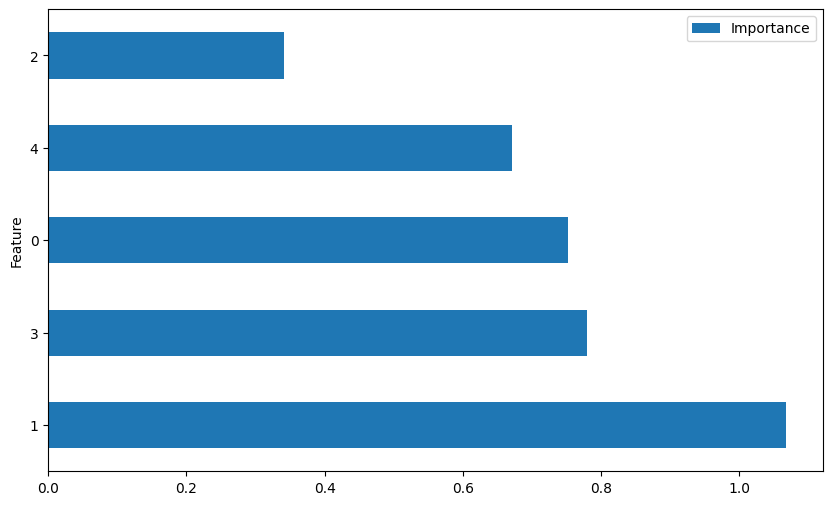

In [11]:
avg_importance = np.mean(np.abs(log_reg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': np.arange(log_reg.coef_.shape[1]), 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [17]:
# for 20 dimensions
# dimensionality reduction
pca_20d = PCA(n_components=20)
mnist_X = pca_20d.fit_transform(mnist.data.to_numpy()/255.0)
# train/test split
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, stratify=mnist_y, test_size=0.2)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(mnist_X_train, mnist_y_train)

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = log_reg.predict(mnist_X_test)
print(f1_score(mnist_y_test, y_pred, average='weighted'))

0.8779763246442976


In [20]:
log_reg.coef_

array([[ 2.24866313e+00, -3.50209429e-01,  3.33275995e-01,
        -4.70006283e-01, -1.45117197e+00,  1.35965448e-01,
        -2.60594037e-01,  1.49822709e-01, -1.33311320e-01,
         2.05520457e-01, -6.85581839e-01, -6.56572351e-01,
        -5.30385828e-01, -1.11094758e+00, -6.84360856e-02,
         5.71314745e-01,  1.00823816e+00,  1.04588037e+00,
        -4.56984308e-01,  7.18299493e-02],
       [-2.50819057e+00, -1.87117231e+00, -2.82613288e-02,
         1.53250408e-01, -1.49876118e-01, -5.61889358e-02,
        -1.21925820e-01, -4.04076058e-01,  2.18737871e-01,
         1.01922789e+00, -1.81067526e-01,  6.80270373e-01,
         1.03642828e+00,  5.61930480e-01, -2.72242950e-01,
        -4.48449002e-01, -8.30125559e-01, -1.22850310e+00,
         7.57354821e-01, -2.99981749e-01],
       [ 4.21784926e-01, -1.12509713e+00,  4.44268736e-01,
         1.18701399e+00,  6.70595909e-01,  5.54668691e-01,
         5.48938990e-01,  7.95815250e-03, -6.57384529e-01,
         5.72603058e-01,  4.1

<Axes: ylabel='Feature'>

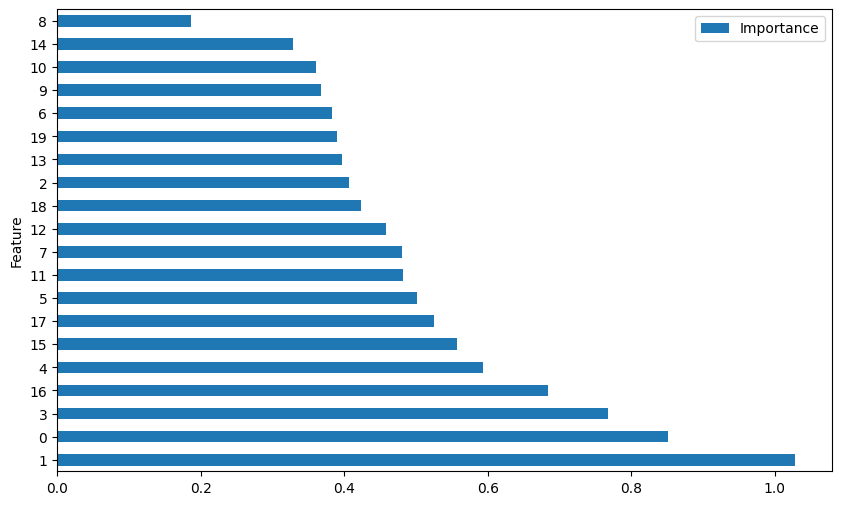

In [21]:
avg_importance = np.mean(np.abs(log_reg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': np.arange(log_reg.coef_.shape[1]), 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# Part B) Running PCA on Spambase

In [27]:
spambase_X_train, spambase_X_test, spambase_y_train, spambase_y_test = train_test_split(spambase.iloc[:, :-1], spambase.iloc[:, -1], test_size=0.2, stratify=spambase.iloc[:, -1])

In [28]:
log_reg = LogisticRegression()
log_reg.fit(spambase_X_train, spambase_y_train)

LogisticRegression()

In [29]:
y_pred = log_reg.predict(spambase_X_test)
print(f1_score(spambase_y_test, y_pred))

0.9029535864978903


In [30]:
# dimension Reduction using PCA
for components in range(5, len(spambase.columns[:-1]), 5):
    # Train/test split of spambase dataset
    spambase_X = PCA(n_components=components).fit_transform(spambase.iloc[:, :-1])
    spambase_y = spambase.iloc[:, -1]
    spambase_X_train, spambase_X_test, spambase_y_train, spambase_y_test = train_test_split(spambase_X, spambase_y, test_size=0.2, stratify=spambase_y)
    log_reg = LogisticRegression()
    log_reg.fit(spambase_X_train, spambase_y_train)
    # computing performance on test set
    y_pred = log_reg.predict(spambase_X_test)
    print(f"F1-score obtained by running logistic regression on spambase data with {components} is {f1_score(spambase_y_test, y_pred)}")


F1-score obtained by running logistic regression on spambase data with 5 is 0.8281938325991189
F1-score obtained by running logistic regression on spambase data with 10 is 0.8795518207282913
F1-score obtained by running logistic regression on spambase data with 15 is 0.875
F1-score obtained by running logistic regression on spambase data with 20 is 0.8895265423242468
F1-score obtained by running logistic regression on spambase data with 25 is 0.8960674157303371
F1-score obtained by running logistic regression on spambase data with 30 is 0.8834532374100719
F1-score obtained by running logistic regression on spambase data with 35 is 0.8719424460431655
F1-score obtained by running logistic regression on spambase data with 40 is 0.8983516483516483
F1-score obtained by running logistic regression on spambase data with 45 is 0.9090909090909092
F1-score obtained by running logistic regression on spambase data with 50 is 0.8873239436619718
F1-score obtained by running logistic regression on sp